# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### The 10 Countries with Most Projects

> #### <font color =red >_Load JSON files_</font>

In [8]:
# File location in local computer

world_bank_json_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Mini-Projects/data_wrangling_json/data/world_bank_projects.json')


#Approach 1: Load json file as a pandas dataframe directly

world_bank_json_df = pd.read_json(world_bank_json_path)

world_bank_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,{'$oid': '52b213b38594d8a2be17c785'},2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,JB,IBRD,Active,Y,"{'Percent': 100, 'Name': 'Social safety nets'}","[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,{'$oid': '52b213b38594d8a2be17c786'},2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,{'$oid': '52b213b38594d8a2be17c787'},2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,LR,IBRD,Active,N,"{'Percent': 100, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,{'$oid': '52b213b38594d8a2be17c788'},2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,TI,IBRD,Active,N,"{'Percent': 87, 'Name': 'Other rural developme...","[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,{'$oid': '52b213b38594d8a2be17c789'},2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,"BM,BC,BZ",IBRD,Active,N,"{'Percent': 33, 'Name': 'Other accountability/...","[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


In [9]:
#Approach 2: Load json as string and then normalize into a dataframe

world_bank_json_string = json.load((open(world_bank_json_path)))

world_bank_json_string_normalized = json_normalize(world_bank_json_string)

world_bank_json_string_normalized

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
0,52b213b38594d8a2be17c780,1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,Education for all,100,"[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,52b213b38594d8a2be17c781,2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,Other economic management,30,"[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,52b213b38594d8a2be17c782,2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,Regional integration,46,"[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,52b213b38594d8a2be17c783,2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,Participation and civic engagement,50,"[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,52b213b38594d8a2be17c784,2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,IBRD,Active,N,Export development and competitiveness,30,"[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
5,52b213b38594d8a2be17c785,2014,October,2013-10-31T00:00:00Z,REPUBLIC OF KENYA,NaN,Republic of Kenya!$!KE,KE,Republic of Kenya,Kenya,...,IBRD,Active,Y,Social safety nets,100,"[{'code': '54', 'name': 'Social safety nets'}]",54,10000000,10000000,http://www.worldbank.org/projects/P146161?lang=en
6,52b213b38594d8a2be17c786,2014,October,2013-10-29T00:00:00Z,GOVERNMENT OF INDIA,2019-06-30T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,IBRD,Active,N,Administrative and civil service reform,20,"[{'code': '25', 'name': 'Administrative and ci...","39,25",500000000,500000000,http://www.worldbank.org/projects/P121185/firs...
7,52b213b38594d8a2be17c787,2014,October,2013-10-29T00:00:00Z,PEOPLE'S REPUBLIC OF CHINA,NaN,People's Republic of China!$!CN,CN,People's Republic of China,China,...,IBRD,Active,N,Climate change,100,"[{'code': '81', 'name': 'Climate change'}]",81,0,27280000,http://www.worldbank.org/projects/P127033/chin...
8,52b213b38594d8a2be17c788,2014,October,2013-10-29T00:00:00Z,THE GOVERNMENT OF INDIA,2018-12-31T00:00:00Z,Republic of India!$!IN,IN,Republic of India,India,...,IBRD,Active,N,Other rural development,87,"[{'code': '79', 'name': 'Other rural developme...",79,160000000,160000000,http://www.worldbank.org/projects/P130164/raja...
9,52b213b38594d8a2be17c789,2014,October,2013-10-29T00:00:00Z,THE KINGDOM OF MOROCCO,2014-12-31T00:00:00Z,Kingdom of Morocco!$!MA,MA,Kingdom of Morocco,Morocco,...,IBRD,Active,N,Other accountability/anti-corruption,33,"[{'code': '29', 'name': 'Other accountability/...","27,30,29",200000000,200000000,http://www.worldbank.org/projects/P130903?lang=en


> #### <font color =red >_Find and Graph the top 10 countries with most projects_</font>

In [10]:
# Find top 10 in df using value_counts method

top_10_projects_value_counts = pd.value_counts(world_bank_json_string_normalized['countryshortname'].values).nlargest(10)
print(top_10_projects_value_counts)

# Find top 10 in df using group by method


top_10_projects_group_by = world_bank_json_string_normalized[['countryshortname','countryname']].groupby('countryshortname').count().sort_values('countryname',ascending=False).head(10)
print(top_10_projects_group_by)

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Morocco               12
Bangladesh            12
Africa                11
Mozambique            11
dtype: int64
                    countryname
countryshortname               
China                        19
Indonesia                    19
Vietnam                      17
India                        16
Yemen, Republic of           13
Nepal                        12
Bangladesh                   12
Morocco                      12
Mozambique                   11
Africa                       11


In [11]:
#Import matplotlib & numpy for graphing top 10 countries

import matplotlib.pyplot as plt
import numpy as np

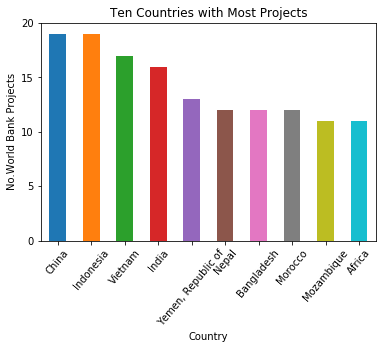

In [12]:
#Create bar graph of top 10 countries with most projects

top_10_projects_group_by['countryname'].plot.bar() #create bar plot

plt.title('Ten Countries with Most Projects') #add title 

plt.xlabel('Country') #add x-axis label

plt.ylabel('No.World Bank Projects') #add y-axis label

plt.yticks(np.arange(0, 21, 5)) #customize y-axis tick sizes and step

plt.xticks(rotation = 50) #rotate x-axis ticks 50 degrees

plt.show() #show resulting graph

### The top 10 Project Themes

> #### <font color =red >_Find and graph the top 10 project themes_</font>

In [13]:
#Look at contents of the column

mjtheme_namecode_sample = world_bank_json_string_normalized['mjtheme_namecode']

mjtheme_namecode_sample.head() #still in json

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [14]:
# Normalize mjtheme_namecode column into a dataframe

norm_mjtheme = json_normalize(world_bank_json_string, 'mjtheme_namecode')

norm_mjtheme.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [15]:
# Find top 10 themes using value_counts method

top_10_theme_value_counts = pd.value_counts(norm_mjtheme['name'].values).nlargest(10)

print(top_10_theme_value_counts)

# Find top 10 in df using group by method


top_10_theme_group_by = norm_mjtheme[['name','code']].groupby('name').count().sort_values('code',ascending=False).head(10)

print(top_10_theme_group_by)

# It seems 122 have no names

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
dtype: int64
                                              code
name                                              
Environment and natural resources management   223
Rural development                              202
Human development                              197
Public sector governance                       184
Social protection and risk management          158
Financial and private sector development       130
                                               122
Social d

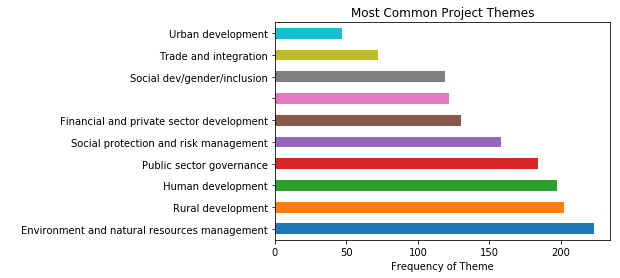

In [16]:
#Create bar graph of top 10 countries with most projects

top_10_theme_group_by['code'].plot.barh() #create bar plot

plt.title('Most Common Project Themes') #add title

plt.ylabel(' ') #blank y-axis label

plt.xlabel('Frequency of Theme') #add x-axis label

plt.show() #show resulting graph

### Filling Missing Values

> #### <font color =red >_Three aproaches for filling the missing name values_</font>

In [17]:
#Approach 1: Fill with NaN

norm_mjtheme_fillna_1 = norm_mjtheme.replace('',np.nan)

norm_mjtheme_fillna_1.head(10)

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [18]:
#Approach 2: Fill with Missing

norm_mjtheme_fillna_2 = norm_mjtheme.replace('','missing')

norm_mjtheme_fillna_2.head(10)

,code,name
0,8,Human development
1,11,missing
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [19]:
#Approach 3: Find Unique Codes and Match to Missing Names

code_list = norm_mjtheme.drop_duplicates(['name']).sort_values(by=['code','name'])

code_list = code_list.drop(code_list.index[2]) #drop one empty name value

norm_mjtheme_fillna_3 = pd.merge(norm_mjtheme,code_list,on='code')

norm_mjtheme_fillna_3.columns = ['code','name','matched_name']

norm_mjtheme_fillna_3.head(10)

,code,name,matched_name
0,8,Human development,Human development
1,8,,Human development
2,8,Human development,Human development
3,8,Human development,Human development
4,8,Human development,Human development
5,8,Human development,Human development
6,8,Human development,Human development
7,8,Human development,Human development
8,8,Human development,Human development
9,8,Human development,Human development


> #### <font color =red >_Results of each approach missing value fills_</font>

In [20]:
#Value counts as a result of Approach 1: Fill with NaN

pd.value_counts(norm_mjtheme_fillna_1['name'].values, dropna=False)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
NaN                                             122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
dtype: int64

In [21]:
#Value counts as a result of Approach 2: Fill with missing

pd.value_counts(norm_mjtheme_fillna_2['name'].values, dropna=False)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
missing                                         122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
dtype: int64

In [22]:
#Value counts as a result of Approach 3: Match Names to Code

pd.value_counts(norm_mjtheme_fillna_3['matched_name'].values, dropna=False)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
dtype: int64

# End of Notebook